# Lending Club default prediction
### Jay Zhu

# Part 1. Read in and explore the data
Read in data using pd.read_csv. 
List column information. 
List values of the first few rows. 
Identify important columns, e.g. loan amount, loan date, loan grade, loan status, etc. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('LoanStats_2015_subset.csv')

C:\Users\Mengfan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# explore the data
print(data.columns)
print(data.shape)

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util',
       ...
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object', length=105)
(421097, 105)


In [3]:
data.iloc[:,:20].head(6)

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,NaN,23.84,NaN,Nov-2003,10+ years,Teacher
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,NaN,9.54,NaN,Feb-1996,1 year,Director
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,NaN,31.88,NaN,Oct-2002,10+ years,Engineer
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,NaN,18.50,NaN,Aug-1997,2 years,Vice-President
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,0.0,0.0,0.0,0.0,NaN,17.56,NaN,Jun-2006,< 1 year,RN
5,0.0,1.0,OH,52.0,104000.0,NaN,Individual,3068.0,8302.0,75.0,0.0,0.0,0.0,0.0,NaN,14.01,NaN,Nov-2000,8 years,Aviation Safety Inspector


In [4]:
data.iloc[:,20:40].head(6)

,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op
0,12000.0,12000.0,B,MORTGAGE,NaN,61.0,w,0.0,0.0,0.0,253.79,9.80%,Dec-2015,12000.0,Fully Paid,7909.0,NaN,127.0,145.0,4.0
1,25000.0,25000.0,A,MORTGAGE,NaN,6.0,w,0.0,0.0,0.0,752.87,5.32%,Dec-2015,25000.0,Current,19339.0,NaN,166.0,238.0,4.0
2,28000.0,28000.0,D,MORTGAGE,NaN,44.0,w,1.0,0.0,0.0,718.51,18.49%,Dec-2015,28000.0,Current,7213.0,NaN,143.0,158.0,4.0
3,30000.0,30000.0,D,MORTGAGE,NaN,84.0,w,4.0,3.0,1.0,1051.31,15.77%,Dec-2015,30000.0,Fully Paid,12141.0,NaN,118.0,220.0,16.0
4,17600.0,17600.0,E,RENT,NaN,83.0,w,0.0,0.0,0.0,465.22,19.89%,Dec-2015,17600.0,Current,5998.0,NaN,112.0,114.0,25.0
5,33600.0,33600.0,B,RENT,NaN,NaN,w,1.0,5.0,2.0,1096.53,10.78%,Dec-2015,33600.0,Fully Paid,12992.0,NaN,156.0,181.0,8.0


In [5]:
data.iloc[:,40:60].head(6)

,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats
0,1.0,2.0,NaN,NaN,NaN,1.0,4.0,NaN,14.0,NaN,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0
1,4.0,7.0,NaN,NaN,NaN,28.0,73.0,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0
2,4.0,2.0,NaN,NaN,NaN,22.0,10.0,NaN,16.0,NaN,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0
3,6.0,3.0,61.0,NaN,NaN,6.0,16.0,NaN,0.0,61.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0
4,13.0,0.0,NaN,NaN,NaN,13.0,25.0,NaN,NaN,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0
5,8.0,1.0,29.0,29.0,NaN,50.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0


In [6]:
data.iloc[:,60:80].head(6)

,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade
0,0.0,0.0,0.0,3.0,18.0,2.0,2.0,3.0,6.0,1.0,5.0,100.0,0.0,1.0,0.0,0.0,debt_consolidation,9786.0,13.4%,B3
1,0.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,2.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,credit_card,19339.0,42.5%,A1
2,0.0,0.0,0.0,2.0,27.0,1.0,0.0,2.0,2.0,2.0,6.0,100.0,50.0,1.0,0.0,0.0,debt_consolidation,43413.0,51.9%,D5
3,0.0,0.0,0.0,3.0,9.0,2.0,2.0,4.0,4.0,0.0,1.0,95.7,33.3,1.0,0.0,0.0,home_improvement,21831.0,50.3%,D1
4,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,4.0,0.0,0.0,100.0,100.0,1.0,0.0,0.0,credit_card,12900.0,102.4%,E3
5,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,96.8,33.3,1.0,0.0,0.0,debt_consolidation,28475.0,51.8%,B4


In [7]:
data.iloc[:,80:100].head(6)

,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util
0,0.0,60 months,Debt consolidation,181540.0,291626.0,37.0,74787.0,65001.0,49500.0,0.0,105910.0,73200.0,Not Verified,660xx,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,36 months,Credit card refinancing,430856.0,512381.0,18.0,44786.0,25447.0,44000.0,7.0,51081.0,45500.0,Not Verified,054xx,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,60 months,Debt consolidation,193745.0,267312.0,46.0,57302.0,13889.0,58500.0,0.0,31758.0,83600.0,Verified,471xx,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,36 months,Home improvement,408118.0,447599.0,23.0,152571.0,130740.0,43400.0,3.0,146568.0,43400.0,Not Verified,430xx,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,60 months,NaN,133285.0,139633.0,25.0,133285.0,120385.0,12600.0,1.0,127033.0,12600.0,Verified,322xx,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,36 months,Debt consolidation,42952.0,92909.0,31.0,42952.0,14477.0,33200.0,0.0,37909.0,55000.0,Source Verified,441xx,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.iloc[:,100:].head(6)

,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [9]:
data['loan_status'].value_counts()

Fully Paid            196814
Current               151713
Charged Off            63845
Late (31-120 days)      4905
In Grace Period         2757
Late (16-30 days)       1052
Default                    9
Name: loan_status, dtype: int64

### Observation: 
It appears that two categories: Fully paid, and Charged off can be used to describe the final status (default) of a loan.

In [10]:
data['issue_d'].value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Feb-2015    23770
Name: issue_d, dtype: int64

### Observation:
It appears that the current dataset only covers loans in 2015

In [11]:
data['grade'].value_counts().sort_index()

A     73336
B    117606
C    120567
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64

Text(0,0.5,'Loan grade')

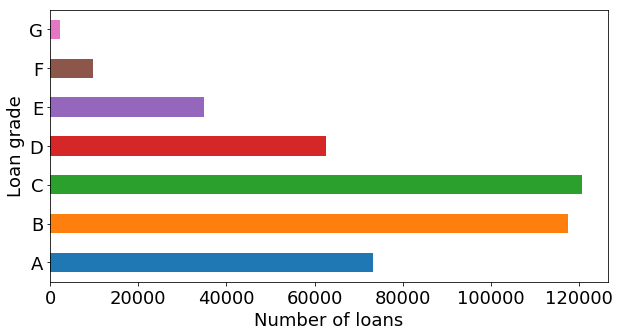

In [12]:
# Plot the number of loans for each grade

import matplotlib.pyplot as plt
%matplotlib inline
fig2a = plt.figure(figsize=(10,5))
data['grade'].value_counts().sort_index().plot.barh(fontsize=18)
plt.xlabel('Number of loans', fontsize=18)
plt.ylabel('Loan grade', fontsize=18)

### Observation:
C and B grade loans are the most common 

In [13]:
data['int_rate'].describe()

count      421095
unique        111
top         7.89%
freq        20305
Name: int_rate, dtype: object

### Observation: 
Interest rate needs to be converted to numeric

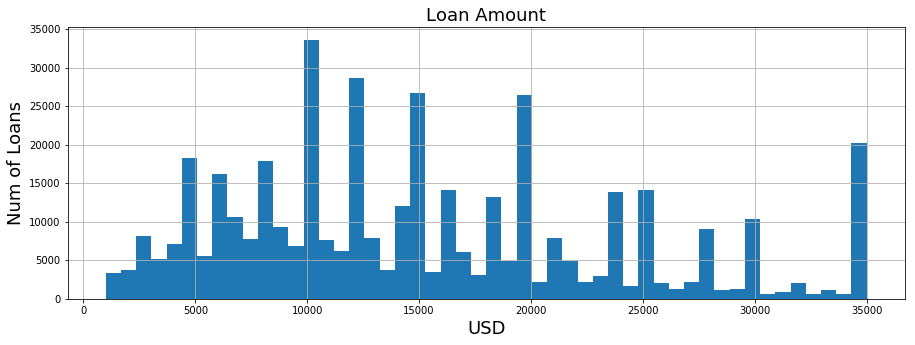

In [14]:
# Plot histogram of the loan amount
fig1 = plt.figure()
data['loan_amnt'].hist(bins=50, figsize=(15,5))
plt.title('Loan Amount', fontsize=18)
plt.xlabel('USD', fontsize=18)
plt.ylabel('Num of Loans', fontsize=18)
plt.show()

# Part 2. KPI Reporting

## 2.1. What is the monthly total loan volume in dollars and what is the monthly average loan size?

In [15]:
# Aggregate loan amount by month. 
# First, let's look into 2 columns: issue_date, and loan_amount
print(data[['issue_d', 'loan_amnt']].info())
print(data[['issue_d', 'loan_amnt']].isnull().sum())
data[['issue_d', 'loan_amnt']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 2 columns):
issue_d      421095 non-null object
loan_amnt    421095 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.4+ MB
None
issue_d      2
loan_amnt    2
dtype: int64


,issue_d,loan_amnt
0,Dec-2015,12000.0
1,Dec-2015,25000.0
2,Dec-2015,28000.0
3,Dec-2015,30000.0
4,Dec-2015,17600.0


In [16]:
# Copy these two columns into a new dataframe and drop the NaN values. 
data1 = data[['issue_d', 'loan_amnt']].copy()
data1.dropna(axis=0, inplace=True)
data1[['issue_d', 'loan_amnt']].isnull().sum()

issue_d      0
loan_amnt    0
dtype: int64

In [17]:
# Convert month to digit format in order to sort by date. 
import datetime
def conv_date(datestr):
    return datetime.datetime.strptime(datestr, '%b-%Y').strftime("%m/%Y")

mapping = {}
for item in data1['issue_d'].value_counts().index:
    mapping[item] = conv_date(item)
print(mapping)

data1['issue_d'] = data1['issue_d'].map(mapping)
data1.head()

{'Oct-2015': '10/2015', 'Jul-2015': '07/2015', 'Dec-2015': '12/2015', 'Nov-2015': '11/2015', 'Aug-2015': '08/2015', 'Apr-2015': '04/2015', 'Jan-2015': '01/2015', 'May-2015': '05/2015', 'Sep-2015': '09/2015', 'Jun-2015': '06/2015', 'Mar-2015': '03/2015', 'Feb-2015': '02/2015'}


,issue_d,loan_amnt
0,12/2015,12000.0
1,12/2015,25000.0
2,12/2015,28000.0
3,12/2015,30000.0
4,12/2015,17600.0


In [18]:
# Calculate sum loan amount by month. 
data1_monthly_sum = pd.pivot_table(data1, values='loan_amnt', index='issue_d', aggfunc=np.sum).reset_index()
print('Monthly Total Loan Volumns Are As Below')
data1_monthly_sum

Monthly Total Loan Volumns Are As Below


,issue_d,loan_amnt
0,01/2015,533132575.0
1,02/2015,366908525.0
2,03/2015,390003275.0
3,04/2015,539401075.0
4,05/2015,483189475.0
5,06/2015,429777175.0
6,07/2015,696238600.0
7,08/2015,555331400.0
8,09/2015,450246800.0
9,10/2015,738221400.0


In [19]:
# Calculate average loan amount by month. 
data1_monthly_ave = pd.pivot_table(data1, values='loan_amnt', index='issue_d', aggfunc=np.mean).reset_index()
print('Monthly Average Loan Sizes Are As Below')
data1_monthly_ave

Monthly Average Loan Sizes Are As Below


,issue_d,loan_amnt
0,01/2015,15185.933717
1,02/2015,15435.781447
2,03/2015,15354.459646
3,04/2015,15225.705676
4,05/2015,15140.835240
5,06/2015,15087.841847
6,07/2015,15148.135416
7,08/2015,15474.875996
8,09/2015,15720.358926
9,10/2015,15180.057988


Text(0.5,1,'Monthly Average Loan Size')

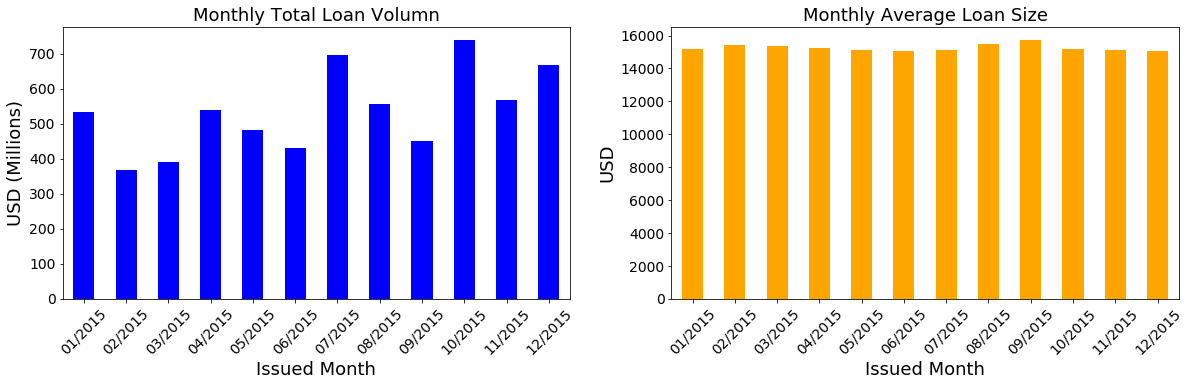

In [20]:
# Plot the monthly total loan volumn, and monthly average loan size
fig3, axis = plt.subplots(1,2, figsize=(20,5))
data1_monthly_sum['loan_million'] = data1_monthly_sum['loan_amnt']/1e6
data1_monthly_sum.plot.bar(x='issue_d', y='loan_million', rot=45, color='blue', legend=False, fontsize=14, ax=axis[0])
data1_monthly_ave.plot.bar(x='issue_d', y='loan_amnt', rot=45, color='orange', legend=False, fontsize=14, ax=axis[1])
axis[0].set_ylabel('USD (Millions)', fontsize=18)
axis[1].set_ylabel('USD', fontsize=18)
axis[0].set_xlabel('Issued Month', fontsize=18)
axis[1].set_xlabel('Issued Month', fontsize=18)
axis[0].set_title('Monthly Total Loan Volumn', fontsize=18)
axis[1].set_title('Monthly Average Loan Size', fontsize=18)

### Observation:
Total loan volumn varies quite a lot with different months. Average loan size stays similar for each month. 

## 2.2. What are the default rates by Loan Grade?

In [21]:
# Let's select two columns, loan_status and grade to answer this question 
data['loan_status'].value_counts()

Fully Paid            196814
Current               151713
Charged Off            63845
Late (31-120 days)      4905
In Grace Period         2757
Late (16-30 days)       1052
Default                    9
Name: loan_status, dtype: int64

In [22]:
data['grade'].value_counts().sort_index()

A     73336
B    117606
C    120567
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64

In [23]:
print(data['loan_status'].isnull().sum())
print(data['grade'].isnull().sum())

2
2


In [24]:
# Copy these two columns into a new dataframe and drop the NaN values. 

data2 = data[['loan_status', 'grade']].copy()
print(data2.shape)

data2.dropna(axis=0, inplace=True)
print(data2.shape)

data2[['loan_status', 'grade']].isnull().sum()

(421097, 2)
(421095, 2)


loan_status    0
grade          0
dtype: int64

In [25]:
data2.head()

,loan_status,grade
0,Fully Paid,B
1,Current,A
2,Current,D
3,Fully Paid,D
4,Current,E


### For loan status, let's only keep Fully Paid, and Charged Off for this analysis, as the other statuses represent ongoing loan that are not closed yet. 

In [26]:
data2 = data2[data2['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(data2.shape)

(260659, 2)


In [27]:
# Create another column 'default', with value 1 meaning default, and 0 meaning paid off
mapping_status = {'Fully Paid': 0, 'Charged Off': 1} 
data2['default'] = data2['loan_status'].map(mapping_status)
data2.head()

,loan_status,grade,default
0,Fully Paid,B,0
3,Fully Paid,D,0
5,Fully Paid,B,0
6,Charged Off,D,1
7,Fully Paid,A,0


In [28]:
# Count the total number of loans in each category
data2_by_grade = data2.groupby(['grade']).count().reset_index()[['grade', 'default']]
data2_by_grade.rename(columns={'default': 'number of loans'}, inplace=True)

# Calculate the number of charged off in each grade category
data2_by_grade['number of default'] = data2.groupby(['grade']).sum().reset_index()['default']

# Calculate the default rate in each grade category
data2_by_grade['default perc'] = round(data2_by_grade['number of default'] / data2_by_grade['number of loans'] * 100, 2)

data2_by_grade

,grade,number of loans,number of default,default perc
0,A,45686,3303,7.23
1,B,70045,11469,16.37
2,C,73670,19554,26.54
3,D,40131,14733,36.71
4,E,22537,10162,45.09
5,F,6921,3691,53.33
6,G,1669,933,55.90


<Figure size 432x288 with 0 Axes>

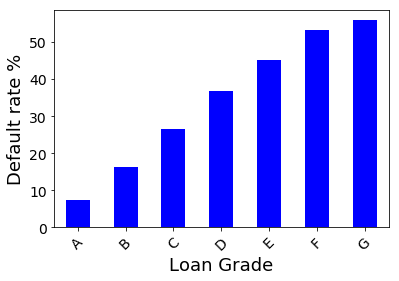

In [29]:
# Plot the default rate by grade
fig4 = plt.figure()
data2_by_grade.plot.bar(x='grade', y='default perc', rot=45, color='blue', legend=False, fontsize=14)

plt.ylabel('Default rate %', fontsize=18)
plt.xlabel('Loan Grade', fontsize=18)
plt.show()

### Observation:
Default rate rises significantly with loan grade

## 2.3. Is Lending Club charging an appropriate interest rate for the risk?

In [30]:
# Need to look at interest rate associated with each loan grade
data3 = data[['int_rate', 'grade']].copy()
data3.dropna(axis=0, inplace=True)

In [31]:
# Convert interest rate to numeric
data3['int_rate'] = data3['int_rate'].str.replace('%', '').str.strip().astype('float')

In [32]:
data3.head()

,int_rate,grade
0,9.80,B
1,5.32,A
2,18.49,D
3,15.77,D
4,19.89,E


In [33]:
# Calculate average interest rate for each loan grade
data3_by_grade = pd.pivot_table(data3, values='int_rate', index='grade', aggfunc=np.mean).reset_index()

data3_by_grade['default perc'] = data2_by_grade['default perc']

In [34]:
data3_by_grade

,grade,int_rate,default perc
0,A,6.941617,7.23
1,B,10.044305,16.37
2,C,13.298285,26.54
3,D,16.724470,36.71
4,E,19.290423,45.09
5,F,23.614716,53.33
6,G,26.835187,55.90


<Figure size 720x360 with 0 Axes>

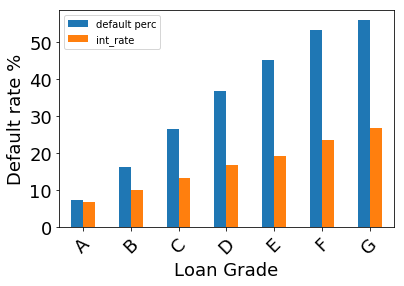

In [35]:
# Plot the default rate by grade against ave interest rate
fig5 = plt.figure(figsize=(10,5))
data3_by_grade.plot.bar(x='grade', y=['default perc', 'int_rate'], rot=45, legend=True, fontsize=18)
plt.ylabel('Default rate %', fontsize=18)
plt.xlabel('Loan Grade', fontsize=18)
plt.show()

### Lending club certainly charges a higher interest rate for higher grade of loans, which has higher default rate. However, purely based on these plot, it's difficult to conclude if the interest rate is high enough for the risk. 

### In order to get more accurate answers, we need to know not just how much the default rate is, but also the amounts of the default /charged off loans that are paid partially. 

# Part 3. Modeling

## 3.1. Feature engineering

In [36]:
# Look for missing data
data.iloc[:,:50].isnull().sum()

acc_now_delinq                         2
acc_open_past_24mths                   2
addr_state                             2
all_util                          399725
annual_inc                             2
annual_inc_joint                  420586
application_type                       2
avg_cur_bal                            2
bc_open_to_buy                      3965
bc_util                             4229
chargeoff_within_12_mths               2
collections_12_mths_ex_med             2
delinq_2yrs                            2
delinq_amnt                            2
desc                              421052
dti                                    4
dti_joint                         420588
earliest_cr_line                       2
emp_length                         23819
emp_title                          23876
funded_amnt                            2
funded_amnt_inv                        2
grade                                  2
home_ownership                         2
id              

In [37]:
data.iloc[:,50:].isnull().sum()

num_accts_ever_120_pd                       2
num_actv_bc_tl                              2
num_actv_rev_tl                             2
num_bc_sats                                 2
num_bc_tl                                   2
num_il_tl                                   2
num_op_rev_tl                               2
num_rev_accts                               3
num_rev_tl_bal_gt_0                         2
num_sats                                    2
num_tl_120dpd_2m                        19232
num_tl_30dpd                                2
num_tl_90g_dpd_24m                          2
num_tl_op_past_12m                          2
open_acc                                    2
open_acc_6m                            399725
open_il_12m                            399725
open_il_24m                            399725
open_act_il                            399725
open_rv_12m                            399725
open_rv_24m                            399725
pct_tl_nvr_dlq                    

In [38]:
print('Total number of loans is {}'.format(data.shape[0]))

Total number of loans is 421097


In [39]:
# List columns with more than 100000 missing data, and the best option is to drop these columns
cols_missing_over100k = data.columns[data.isnull().sum() > 10000]
print(cols_missing_over100k)

Index(['all_util', 'annual_inc_joint', 'desc', 'dti_joint', 'emp_length',
       'emp_title', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc',
       'member_id', 'mo_sin_old_il_acct', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record',
       'mths_since_rcnt_il', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_tl_120dpd_2m', 'open_acc_6m', 'open_il_12m', 'open_il_24m',
       'open_act_il', 'open_rv_12m', 'open_rv_24m', 'total_bal_il',
       'total_cu_tl', 'revol_bal_joint', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object')


In [40]:
data_drop1 = data.copy()
data_drop1.drop(cols_missing_over100k, axis=1, inplace=True)

In [41]:
data_drop1.shape

(421097, 65)

In [42]:
data_drop1.isnull().sum()[:30]

acc_now_delinq                   2
acc_open_past_24mths             2
addr_state                       2
annual_inc                       2
application_type                 2
avg_cur_bal                      2
bc_open_to_buy                3965
bc_util                       4229
chargeoff_within_12_mths         2
collections_12_mths_ex_med       2
delinq_2yrs                      2
delinq_amnt                      2
dti                              4
earliest_cr_line                 2
funded_amnt                      2
funded_amnt_inv                  2
grade                            2
home_ownership                   2
initial_list_status              2
inq_last_6mths                   2
installment                      2
int_rate                         2
issue_d                          2
loan_amnt                        2
loan_status                      2
mo_sin_old_rev_tl_op             2
mo_sin_rcnt_rev_tl_op            2
mo_sin_rcnt_tl                   2
mort_acc            

In [43]:
data_drop1.isnull().sum()[30:]

num_accts_ever_120_pd            2
num_actv_bc_tl                   2
num_actv_rev_tl                  2
num_bc_sats                      2
num_bc_tl                        2
num_il_tl                        2
num_op_rev_tl                    2
num_rev_accts                    3
num_rev_tl_bal_gt_0              2
num_sats                         2
num_tl_30dpd                     2
num_tl_90g_dpd_24m               2
num_tl_op_past_12m               2
open_acc                         2
pct_tl_nvr_dlq                   2
percent_bc_gt_75              4241
policy_code                      2
pub_rec                          2
pub_rec_bankruptcies             2
purpose                          2
revol_bal                        2
revol_util                     164
sub_grade                        2
tax_liens                        2
term                             2
title                          134
tot_cur_bal                      2
tot_hi_cred_lim                  2
total_acc           

In [44]:
# Next, select the columns with more than 2 but less than 100000 missing data, and investigate them to find out the reason
cols_missing_2to100k = data_drop1.columns[data_drop1.isnull().sum() > 2]
cols_missing_2to100k

Index(['bc_open_to_buy', 'bc_util', 'dti', 'mths_since_recent_bc',
       'num_rev_accts', 'percent_bc_gt_75', 'revol_util', 'title'],
      dtype='object')

### Here are the rest of the missing columns  
bc_open_to_buy:	        Total open to buy on revolving bankcards.

bc_util:	            Ratio of total current balance to high credit/credit limit for all bankcard accounts.

dti:           	        A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

mths_since_recent_bc: 	Months since most recent bankcard account opened.

num_rev_accts:       	Number of revolving accounts

percent_bc_gt_75:    	Percentage of all bankcard accounts > 75% of limit.

revol_util:          	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	

title:               	The loan title provided by the borrower





In [45]:
data_drop1[cols_missing_2to100k].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 8 columns):
bc_open_to_buy          417132 non-null float64
bc_util                 416868 non-null float64
dti                     421093 non-null float64
mths_since_recent_bc    417297 non-null float64
num_rev_accts           421094 non-null float64
percent_bc_gt_75        416856 non-null float64
revol_util              420933 non-null object
title                   420963 non-null object
dtypes: float64(6), object(2)
memory usage: 25.7+ MB


### There are multiple ways to impute the missing data. Here I choose to fill with mean value of each column for the numeric columns, and most common category for the non-numeric column 'title'

In [46]:
# Impute the numeric columns from the columns with missing data of 2 to 100k, and save it as a subset
# revol_until needs to be converted from string to numeric first

data_drop1['revol_util'] = data_drop1['revol_util'].str.replace('%', '').str.strip().astype('float')
data_drop1[cols_missing_2to100k[:-1]] = data_drop1[cols_missing_2to100k[:-1]].fillna(np.mean)

In [47]:
# For the title column, replace NaN with the most common category
data_drop1['title'].fillna(data_drop1['title'].value_counts().index[0], inplace=True)

In [48]:
data_drop1.isnull().sum()

acc_now_delinq                2
acc_open_past_24mths          2
addr_state                    2
annual_inc                    2
application_type              2
avg_cur_bal                   2
bc_open_to_buy                0
bc_util                       0
chargeoff_within_12_mths      2
collections_12_mths_ex_med    2
delinq_2yrs                   2
delinq_amnt                   2
dti                           0
earliest_cr_line              2
funded_amnt                   2
funded_amnt_inv               2
grade                         2
home_ownership                2
initial_list_status           2
inq_last_6mths                2
installment                   2
int_rate                      2
issue_d                       2
loan_amnt                     2
loan_status                   2
mo_sin_old_rev_tl_op          2
mo_sin_rcnt_rev_tl_op         2
mo_sin_rcnt_tl                2
mort_acc                      2
mths_since_recent_bc          0
                             ..
num_il_t

In [49]:
# At last, remove rows with the rest of the null values
data_drop1.dropna(axis=0, inplace=True)

In [50]:
data_drop1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 65 columns):
acc_now_delinq                421095 non-null float64
acc_open_past_24mths          421095 non-null float64
addr_state                    421095 non-null object
annual_inc                    421095 non-null float64
application_type              421095 non-null object
avg_cur_bal                   421095 non-null float64
bc_open_to_buy                421095 non-null object
bc_util                       421095 non-null object
chargeoff_within_12_mths      421095 non-null float64
collections_12_mths_ex_med    421095 non-null float64
delinq_2yrs                   421095 non-null float64
delinq_amnt                   421095 non-null float64
dti                           421095 non-null object
earliest_cr_line              421095 non-null object
funded_amnt                   421095 non-null float64
funded_amnt_inv               421095 non-null float64
grade                         4

### Let's examine the non-numeric columns

In [51]:
data_drop1.select_dtypes(include='object').columns

Index(['addr_state', 'application_type', 'bc_open_to_buy', 'bc_util', 'dti',
       'earliest_cr_line', 'grade', 'home_ownership', 'initial_list_status',
       'int_rate', 'issue_d', 'loan_status', 'mths_since_recent_bc',
       'num_rev_accts', 'percent_bc_gt_75', 'purpose', 'revol_util',
       'sub_grade', 'term', 'title', 'verification_status', 'zip_code'],
      dtype='object')

In [52]:
data_drop1['purpose'].value_counts()

debt_consolidation    250020
credit_card           102025
home_improvement       25293
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64

In [53]:
data_drop1['title'].value_counts()

Debt consolidation                         250058
Credit card refinancing                    102056
Home improvement                            25264
Other                                       19179
Major purchase                               7434
Medical expenses                             3926
Car financing                                3475
Business                                     3357
Moving and relocation                        2422
Vacation                                     2246
Home buying                                  1440
Green loan                                    223
New Baby and New House (CC Consolidate)         1
Student Loan                                    1
Pay off Lowes Card                              1
Paying off higher interest cards & auto         1
DebtC                                           1
Credit Card/Auto Repair                         1
Trying to come back to reality!                 1
Simple Loan Until Contract Is Completed         1


In [54]:
data_drop1['home_ownership'].value_counts()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

In [55]:
data_drop1['application_type'].value_counts()

Individual    420584
Joint App        511
Name: application_type, dtype: int64

In [56]:
data_drop1['addr_state'].value_counts()

CA    58067
TX    34699
NY    33844
FL    29298
IL    16864
NJ    15195
PA    14969
OH    14394
GA    14111
NC    12038
VA    12033
MI    11436
MD    10057
AZ     9700
MA     9521
CO     9068
WA     8917
MN     7799
IN     7264
TN     6903
MO     6699
CT     6327
NV     5924
WI     5663
AL     5347
LA     5098
SC     5056
OR     4944
KY     4112
OK     3968
KS     3736
AR     3152
UT     2836
MS     2593
NM     2351
HI     2083
NH     2062
WV     1974
RI     1843
DE     1239
MT     1162
NE     1162
DC     1006
AK      954
WY      900
VT      892
SD      835
ME      521
ND      479
Name: addr_state, dtype: int64

### For non-numeric columns, let's only keep the following, and convert them to dummy variables
addr_state, grade, purpose, term


In [57]:
data_drop1_cat_dummy = pd.get_dummies(data_drop1[['addr_state', 'grade', 'purpose', 'term']])

### Let's then examine the rest of the numeric columns

In [58]:
data_drop1.select_dtypes(exclude='object').columns

Index(['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'delinq_amnt', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths',
       'installment', 'loan_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'policy_code',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'tax_liens',
       'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim'],
      dtype='object')

### Let's drop the following columns as they are leaking information about the loan payment, or 
'delinq_amnt', 'funded_amnt', 'funded_amnt_inv', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'

In [59]:
data_drop1_numeric = data_drop1.select_dtypes(exclude='object').drop(['delinq_amnt', 'funded_amnt', 'funded_amnt_inv', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], axis=1)

In [60]:
data_drop1_numeric.iloc[:,:20].describe()

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,delinq_2yrs,inq_last_6mths,installment,loan_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0
count,421095.000000,421095.00000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,0.006087,4.66500,7.696561e+04,13104.784721,0.347397,0.572690,441.849432,15240.285862,186.586697,13.451247,8.013204,1.685261,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,5.809238
std,0.086482,3.19538,7.394996e+04,15671.803897,0.927695,0.867776,244.849082,8571.325901,95.374931,17.156985,9.189312,1.990160,1.332797,2.304542,3.439764,3.036184,4.822698,7.471041,4.664381,3.346698
min,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,14.010000,1000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,4.600000e+04,3199.000000,0.000000,0.000000,263.930000,8500.000000,120.000000,4.000000,3.000000,0.000000,0.000000,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,3.000000
50%,0.000000,4.00000,6.500000e+04,7262.000000,0.000000,0.000000,385.410000,14000.000000,170.000000,8.000000,5.000000,1.000000,0.000000,3.000000,5.000000,4.000000,7.000000,7.000000,8.000000,5.000000
75%,0.000000,6.00000,9.169050e+04,17974.500000,0.000000,1.000000,578.790000,20000.000000,237.000000,16.000000,10.000000,3.000000,0.000000,5.000000,7.000000,6.000000,11.000000,11.000000,11.000000,7.000000
max,14.000000,64.00000,9.500000e+06,555925.000000,39.000000,6.000000,1445.460000,35000.000000,851.000000,324.000000,263.000000,52.000000,39.000000,32.000000,52.000000,63.000000,70.000000,132.000000,83.000000,45.000000


In [61]:
data_drop1_numeric.iloc[:,20:].describe()

,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq,policy_code,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.0,421095.000000,421095.000000,4.210950e+05,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,421095.000000,4.210950e+05,4.210950e+05
mean,11.894537,0.004042,0.094318,2.170947,11.948643,93.924313,1.0,0.233776,0.133188,1.768548e+04,0.064556,1.400755e+05,1.734070e+05,25.493468,5.222199e+04,21958.208958,4.347865e+04,3.365771e+04
std,5.615119,0.067965,0.522758,1.853858,5.633119,8.875399,0.0,0.649778,0.385975,2.419503e+04,0.444231,1.552696e+05,1.756722e+05,12.097200,4.907494e+04,21840.371112,4.394271e+04,3.766404e+04
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.500000e+03,4.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,8.000000,0.000000,0.000000,1.000000,8.000000,90.900000,1.0,0.000000,0.000000,6.480000e+03,0.000000,3.103900e+04,5.090900e+04,17.000000,2.259850e+04,7800.000000,1.548150e+04,1.440000e+04
50%,11.000000,0.000000,0.000000,2.000000,11.000000,97.400000,1.0,0.000000,0.000000,1.199600e+04,0.000000,7.972900e+04,1.114050e+05,24.000000,3.959600e+04,15200.000000,3.297000e+04,2.460000e+04
75%,15.000000,0.000000,0.000000,3.000000,15.000000,100.000000,1.0,0.000000,0.000000,2.142800e+04,0.000000,2.074750e+05,2.496290e+05,32.000000,6.565100e+04,28600.000000,5.829900e+04,4.168850e+04
max,90.000000,4.000000,39.000000,30.000000,90.000000,100.000000,1.0,86.000000,11.000000,2.904836e+06,85.000000,4.447397e+06,9.999999e+06,169.000000,2.921551e+06,834300.000000,2.101913e+06,9.999999e+06


In [62]:
data_drop1_numeric[data_drop1_numeric['pub_rec']==86]

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,delinq_2yrs,inq_last_6mths,installment,loan_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim
68370,0.0,6.0,38000.0,4723.0,0.0,3.0,216.2,6400.0,81.0,3.0,...,1.0,7788.0,85.0,61402.0,72880.0,19.0,61402.0,3700.0,62980.0,9900.0


### There are quite a number of columns with max value significantly larger than the 75% quantile, suggesting possible outlier/wrong values. 

### Among them, I found one record with both pub_rec and tax_liens being extremely large values. I dedice to delete this record.

### For other records with possible extreme values, I decide to take no action as there's no evidence to prove that they are wrong records. 

In [63]:
print(data_drop1['policy_code'].value_counts())
data_drop1_numeric = data_drop1_numeric.drop('policy_code', axis=1)

1.0    421095
Name: policy_code, dtype: int64


### Policy code is a nominal value, and only has one value. It can be dropped. 

In [64]:
# Concatenate the dummy category columns and the remaining numeric columns, then remove the one record with wrong pub_rec and tax_liens 
data_drop2 = pd.concat([data_drop1_cat_dummy, data_drop1_numeric], axis=1)
print(data_drop2.shape)
data_drop2 = data_drop2[data_drop2['pub_rec']!=86]
print(data_drop2.shape)

(421095, 109)
(421094, 109)


### Rescale all the numeric columns using (x-min)/(max-min)

In [65]:
data_drop2_rescale = (data_drop2 - np.min(data_drop2))/(np.max(data_drop2) - np.min(data_drop2))

In [66]:
data_drop2_rescale.describe()

,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,...,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim
count,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,...,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000
mean,0.002266,0.012698,0.007485,0.023035,0.137896,0.021534,0.015025,0.002389,0.002942,0.069576,...,0.012108,0.006088,0.001399,0.031496,0.017095,0.130264,0.017875,0.026319,0.020685,0.003366
std,0.047544,0.111967,0.086193,0.150016,0.344791,0.145158,0.121653,0.048819,0.054164,0.254431,...,0.035088,0.008329,0.009229,0.034912,0.017572,0.073316,0.016798,0.026178,0.020906,0.003766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002231,0.000000,0.006979,0.004842,0.078788,0.007735,0.009349,0.007365,0.001440
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004130,0.000000,0.017927,0.010893,0.121212,0.013553,0.018219,0.015685,0.002460
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.007377,0.000000,0.046651,0.024719,0.169697,0.022471,0.034280,0.027736,0.004169
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create the target column default (1) or not (0)

In [67]:
# Create another column 'default', with value 1 meaning default, and 0 meaning paid off
mapping_status = {'Fully Paid': 0, 'Charged Off': 1} 
data_drop2_rescale['default'] = data_drop1[data_drop1['pub_rec']!=86]['loan_status'].map(mapping_status)
data_drop2_rescale.dropna(axis=0, inplace=True)

In [68]:
data_drop2_rescale.shape

(260658, 110)

### Now we have the cleaned DataFrame data_drop2_rescale, including 109 feature columns, and 1 target column

## 3.2. Modeling: 

### Class imbalance in the target, much more 0 (paid off) than 1 (default). We can try 
1. Add class weight to punish the misclassification of minority class (1)
2. Use stratified sampling when we split train-test, and K-Fold cross validation. (StratifiedKfold option in most of the models)
3. Choose appropriate error metrics, such as precision, recall, F1 score, etc.

### For modeling algorithms, we can try 
1. Logistic Regression
2. Decision Tree/Random Forest
3. Neural Networks

### 3.2.1. Use RFECV (recursive feature elimination with cross-validation) to select the important features

In [69]:
# Use automated method RFECV to select the best features for prediction 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFECV

lr = LogisticRegression(class_weight='balanced')
selector = RFECV(lr, cv=10)
X = data_drop2_rescale.iloc[:,:-1]
y = data_drop2_rescale.iloc[:,-1]
selector.fit(X, y)
optimized_cols = X.columns[selector.support_]
print(optimized_cols)

Index(['term_ 60 months', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'delinq_2yrs', 'installment', 'loan_amnt', 'mort_acc', 'num_op_rev_tl',
       'num_rev_tl_bal_gt_0', 'revol_bal', 'tot_hi_cred_lim', 'total_acc',
       'total_bal_ex_mort', 'total_bc_limit', 'total_rev_hi_lim'],
      dtype='object')


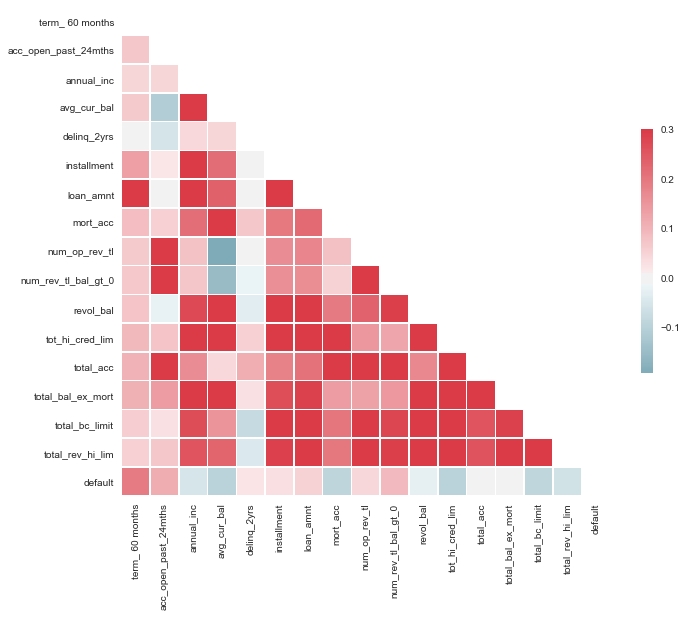

In [70]:
# Plot heatmap of the optimized columns: correlations with target

import seaborn as sns
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
plot_correlation_heatmap(pd.concat([X[optimized_cols], y], axis=1))

### Observations:
By using RFECV feature selection methods, we can narrow down to 16 feature columns from the origional 109.

### 3.2.2. Logistic Regression 

### 3.2.2.1. Use 16 optimized features, and 80-20 train-test split


In [175]:
# Use a simple 80-20 train-test split.  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LogisticRegression(class_weight='balanced')
lr.fit(train_X[optimized_cols], train_y)
test_pred = lr.predict(test_X[optimized_cols])

from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_auc_score

accuracy = round(accuracy_score(test_y, test_pred),4)
f1 = round(f1_score(test_y, test_pred),4)
precision = round(precision_score(test_y, test_pred),4)
recall = round(recall_score(test_y, test_pred),4)
auc = round(roc_auc_score(test_y, test_pred), 4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))



accuracy = 0.6753, f1_score = 0.4744, precision = 0.3947, recall = 0.5944, auc = 0.6481


### 3.2.2.2. Use 16 features, 80-20 train-test split, and stratified sampling option to deal with class imblance

In [176]:
# Use a simple 80-20 train-test split, and use stratified option due to the class imbalance  

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
lr = LogisticRegression(class_weight='balanced')
lr.fit(train_X[optimized_cols], train_y)
test_pred = lr.predict(test_X[optimized_cols])


accuracy = round(accuracy_score(test_y, test_pred),4)
f1 = round(f1_score(test_y, test_pred),4)
precision = round(precision_score(test_y, test_pred),4)
recall = round(recall_score(test_y, test_pred),4)
auc = round(roc_auc_score(test_y, test_pred), 4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.6745, f1_score = 0.4721, precision = 0.3917, recall = 0.5943, auc = 0.6474



### 3.2.2.3. Use 16 features, and stratified 5-fold cross validation

In [177]:
from sklearn.model_selection import KFold, cross_val_score

#kf = KFold(5, shuffle=True, random_state=1)

lr = LogisticRegression(class_weight='balanced')

accuracy = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='roc_auc', cv=5)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.6703, f1_score = 0.6893, precision = 0.7293, recall = 0.6703, auc = 0.7017


### 3.2.2.4. Use 16 features, and stratified 10-fold cross validation

In [178]:
lr = LogisticRegression(class_weight='balanced')

accuracy = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='accuracy', cv=10)),4)
f1 = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='f1_weighted', cv=10)),4)
precision = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='precision_weighted', cv=10)),4)
recall = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='recall_weighted', cv=10)),4)
auc = round(np.mean(cross_val_score(lr, X[optimized_cols], y, scoring='roc_auc', cv=10)),4)


print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))

accuracy = 0.6709, f1_score = 0.6898, precision = 0.7297, recall = 0.6709, auc = 0.7021


### 3.2.2.5. Use all 109 features, and stratified 10-fold cross validation

In [179]:
lr = LogisticRegression(class_weight='balanced')

accuracy = round(np.mean(cross_val_score(lr, X, y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(lr, X, y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(lr, X, y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(lr, X, y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(lr, X, y, scoring='roc_auc', cv=5)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.6497, f1_score = 0.6735, precision = 0.7426, recall = 0.6497, auc = 0.7199


### Observations:
Switching to K-Fold cross validation, we can significantly improve the prediction. Going from k=5 to k=10 doesn't really make a difference. Let's stick to 5-fold cross validation for the rest of the modeling as well.

### 3.2.3. Random Forests

### 3.2.3.1. Use 16 optimized features, 5 trees, 5 minimum samples at each leaf

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=0, min_samples_leaf=5, bootstrap=True, class_weight='balanced')

accuracy = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='roc_auc', cv=5)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7013, f1_score = 0.701, precision = 0.7008, recall = 0.7013, auc = 0.6516


### 3.2.3.2. Use 16 optimized features, 10 trees, 5 minimum samples at each leaf

In [181]:
rf = RandomForestClassifier(n_estimators=10, random_state=0, min_samples_leaf=5, bootstrap=True, class_weight='balanced')

accuracy = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(rf, X[optimized_cols], y, scoring='roc_auc', cv=5)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7216, f1_score = 0.7149, precision = 0.7096, recall = 0.7216, auc = 0.6728


### 3.2.3.3. Use all 109 features, 10 trees, 5 minimum samples at each leaf

In [182]:
rf = RandomForestClassifier(n_estimators=10, random_state=0, min_samples_leaf=5, bootstrap=True, class_weight='balanced')

accuracy = round(np.mean(cross_val_score(rf, X, y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(rf, X, y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(rf, X, y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(rf, X, y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv=5)),4)


print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7192, f1_score = 0.7176, precision = 0.7161, recall = 0.7192, auc = 0.6878


### Observations:
Using all 109 features, 10 trees, 5 minimum samples at each leaf provide the best results. 

### 3.2.4. Neural Networks

### 3.2.4.1. Use 16 optimized features, 2 hidden layers with 32 nodes each

In [183]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes = (32,32), early_stopping=True)

accuracy = round(np.mean(cross_val_score(nn, X[optimized_cols], y, scoring='accuracy', cv=5)),4)
f1 = round(np.mean(cross_val_score(nn, X[optimized_cols], y, scoring='f1_weighted', cv=5)),4)
precision = round(np.mean(cross_val_score(nn, X[optimized_cols], y, scoring='precision_weighted', cv=5)),4)
recall = round(np.mean(cross_val_score(nn, X[optimized_cols], y, scoring='recall_weighted', cv=5)),4)
auc = round(np.mean(cross_val_score(nn, X[optimized_cols], y, scoring='roc_auc', cv=5)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7641, f1_score = 0.7064, precision = 0.7275, recall = 0.7641, auc = 0.7098


### 3.2.4.2. Use all 109 features, 2 hidden layers with 32 nodes each

In [184]:
nn = MLPClassifier(hidden_layer_sizes = (32,32), activation='logistic', early_stopping=True)

accuracy = round(np.mean(cross_val_score(nn, X, y, scoring='accuracy', cv=kf)),4)
f1 = round(np.mean(cross_val_score(nn, X, y, scoring='f1_weighted', cv=kf)),4)
precision = round(np.mean(cross_val_score(nn, X, y, scoring='precision_weighted', cv=kf)),4)
recall = round(np.mean(cross_val_score(nn, X, y, scoring='recall_weighted', cv=kf)),4)
auc = round(np.mean(cross_val_score(nn, X, y, scoring='roc_auc', cv=kf)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7637, f1_score = 0.7075, precision = 0.7263, recall = 0.7633, auc = 0.7189


### 3.2.4.3. Use all 109 features, 2 hidden layers with 100 nodes each, use ReLu activation function, Adam solver, and 0.0001 for regularization

In [185]:
nn = MLPClassifier(hidden_layer_sizes = (100,100), solver='adam', alpha=0.0001, activation='relu', shuffle=True, early_stopping=True)

accuracy = round(np.mean(cross_val_score(nn, X, y, scoring='accuracy', cv=kf)),4)
f1 = round(np.mean(cross_val_score(nn, X, y, scoring='f1_weighted', cv=kf)),4)
precision = round(np.mean(cross_val_score(nn, X, y, scoring='precision_weighted', cv=kf)),4)
recall = round(np.mean(cross_val_score(nn, X, y, scoring='recall_weighted', cv=kf)),4)
auc = round(np.mean(cross_val_score(nn, X, y, scoring='roc_auc', cv=kf)),4)

print('accuracy = {}, f1_score = {}, precision = {}, recall = {}, auc = {}'.format(accuracy, f1, precision, recall, auc))


accuracy = 0.7642, f1_score = 0.711, precision = 0.7274, recall = 0.7648, auc = 0.7205


### 3.2.5. Learning curve

### 3.2.5.1. Logistic regression learning curve, use 16 optimized features

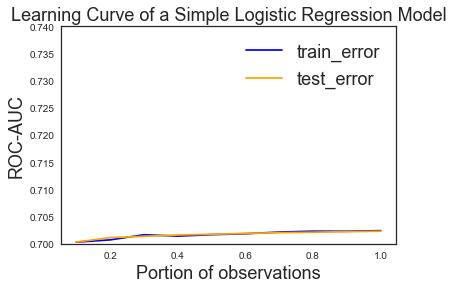

In [193]:
# Plot learning curve for a simple logistic regression model with the optimized 16 features
from sklearn.model_selection import learning_curve

lr = LogisticRegression(class_weight='balanced')

# Percentage of input observations
size_obs = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, valid_scores = learning_curve(lr, X[optimized_cols], y, train_sizes=size_obs, scoring='roc_auc', shuffle=True, cv=kf)


fig4a = plt.figure()
train_score = np.mean(np.asarray(train_scores),axis=1)
valid_score = np.mean(np.asarray(valid_scores),axis=1)


plt.plot(size_obs, train_score, color='blue', label='train_error')
plt.plot(size_obs, valid_score, color='orange', label='test_error')
plt.legend(fontsize=18)
plt.xlabel('Portion of observations',fontsize=18)
plt.ylabel('ROC-AUC',fontsize=18)
plt.ylim(0.7,0.74)
plt.title('Learning Curve of a Simple Logistic Regression Model',fontsize=18)
plt.show()

### 3.2.5.2. Logistic regression learning curve, use all 109 features

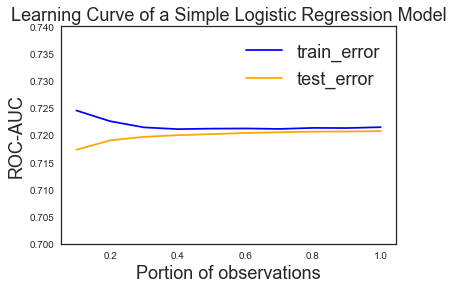

In [194]:
# Learning curve with all 109 features
lr = LogisticRegression(class_weight='balanced')

# Percentage of input observations 
size_obs = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, valid_scores = learning_curve(lr, X, y, train_sizes=size_obs, scoring='roc_auc', shuffle=True, cv=kf)


fig4a1 = plt.figure()
train_score = np.mean(np.asarray(train_scores),axis=1)
valid_score = np.mean(np.asarray(valid_scores),axis=1)


plt.plot(size_obs, train_score, color='blue', label='train_error')
plt.plot(size_obs, valid_score, color='orange', label='test_error')
plt.legend(fontsize=18)
plt.xlabel('Portion of observations',fontsize=18)
plt.ylabel('ROC-AUC',fontsize=18)
plt.ylim(0.7, 0.74)
plt.title('Learning Curve of a Simple Logistic Regression Model',fontsize=18)
plt.show()

### 3.2.5.3. A simple Neural Network model learning curve, use 16 optimized features, 1 hidder layer with 10 nodes

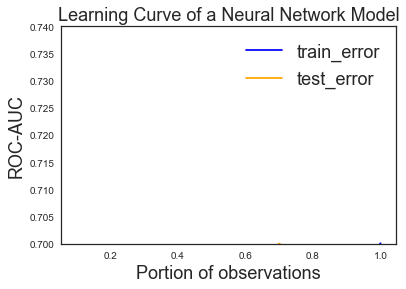

In [195]:
# Plot learning curve for a neural network model with the optimized 16 features

#lr = LogisticRegression(class_weight='balanced')
nn = MLPClassifier(hidden_layer_sizes = (10), solver='adam', alpha=0.0001, activation='relu', shuffle=True, early_stopping=True)


train_sizes, train_scores, valid_scores = learning_curve(nn, X[optimized_cols], y, train_sizes=size_obs, scoring='roc_auc', cv=10)

train_score = np.mean(np.asarray(train_scores),axis=1)
valid_score = np.mean(np.asarray(valid_scores),axis=1)
fig4b = plt.figure()
plt.plot(size_obs, train_score, color='blue', label='train_error')
plt.plot(size_obs, valid_score, color='orange', label='test_error')
plt.legend(fontsize=18)
plt.xlabel('Portion of observations',fontsize=18)
plt.ylabel('ROC-AUC',fontsize=18)
plt.ylim(0.7, 0.74)
plt.title('Learning Curve of a Neural Network Model',fontsize=18)
plt.show()

### 3.2.5.4. A more complidated Neural Network model learning curve, use all 109 features, 2 hidden layers and 100 nodes each

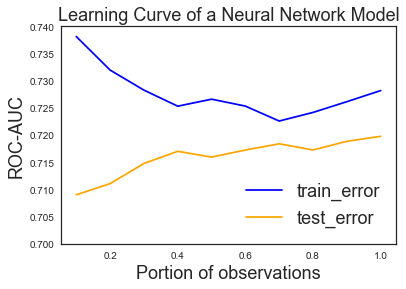

In [196]:
# Plot learning curve for a neural network model with all 109 features
nn = MLPClassifier(hidden_layer_sizes = (100,100), solver='adam', alpha=0.0001, activation='relu', shuffle=True, early_stopping=True)

train_sizes, train_scores, valid_scores = learning_curve(nn, X, y, train_sizes=size_obs, scoring='roc_auc', cv=5)


train_score = np.mean(np.asarray(train_scores),axis=1)
valid_score = np.mean(np.asarray(valid_scores),axis=1)
fig4b1 = plt.figure()
plt.plot(size_obs, train_score, color='blue', label='train_error')
plt.plot(size_obs, valid_score, color='orange', label='test_error')
plt.legend(fontsize=18)
plt.xlabel('Portion of observations',fontsize=18)
plt.ylabel('ROC-AUC',fontsize=18)
plt.ylim(0.7, 0.74)
plt.title('Learning Curve of a Neural Network Model',fontsize=18)
plt.show()

### Observations:
For the simple Neural Network model, even train set was not able to predict well with less number of observations. 
For the more complicated Neural Network model, I can see the learning curve of train set and test (cross-validation) set converging, but there's still a gap in between, suggesting larger variance. More number of observations might help bring the two curves closer. 

### 3.2.5.4. For the more complidated Neural Network model, test different regularization parameters (alpha). 

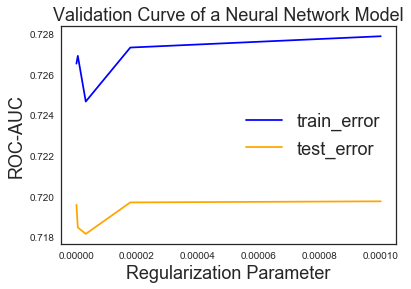

In [200]:
from sklearn.model_selection import validation_curve

nn = MLPClassifier(hidden_layer_sizes = (100,100), solver='adam', activation='relu', shuffle=True, early_stopping=True)

alpha_range = np.logspace(-7, -4, 5) 

train_scores, valid_scores = validation_curve(nn, X, y, 'alpha', alpha_range, scoring='roc_auc', cv=5)


train_score = np.mean(np.asarray(train_scores),axis=1)
valid_score = np.mean(np.asarray(valid_scores),axis=1)
fig5 = plt.figure()
plt.plot(alpha_range, train_score, color='blue', label='train_error')
plt.plot(alpha_range, valid_score, color='orange', label='test_error')
plt.legend(fontsize=18)
plt.xlabel('Regularization Parameter',fontsize=18)
plt.ylabel('ROC-AUC',fontsize=18)
plt.title('Validation Curve of a Neural Network Model',fontsize=18)
plt.show()

### Observation:
I was hoping to see that with a larger regularization parameter, the more complicated Neural Network model could perform better and avoid overfitting. But the plot above shows inconclusive results.